# Acccident Severity Prediction Using Random Forrest Classifier

## Introduction

Road traffic accidents are a major concern, prompting this project to predict accident severity using machine learning. Framing this as a multi-class classification problem, we aim to classify accident severity levels based on various incident features. The core of our solution is the Random Forest Classifier, an ensemble learning method known for its high accuracy and robustness. This algorithm builds multiple decision trees, combining their predictions to improve overall performance and reduce overfitting.

Our machine learning pipeline will cover data preparation, feature engineering, and model training. A key step involves hyperparameter optimization using RandomizedSearchCV, efficiently searching for the best model configurations. Finally, the model's predictive power will be thoroughly evaluated using metrics like accuracy, precision, recall, and F1-score. 

## Importing necessary Dependencies

In [47]:
import numpy as np 
import os
import pandas as pd 
import joblib
import json  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading the Dataset

In [3]:
accidents = pd.read_csv("Accident-Data.csv")

## Data Inspection

In [ ]:
accidents.head()

In [5]:
accidents.shape

(500000, 46)

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [7]:
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [8]:
print("Missing values:\n", accidents.isnull().sum().sort_values(ascending=False))
print("\nDuplicates:", accidents.duplicated().sum())

Missing values:
 End_Lng                  220377
End_Lat                  220377
Precipitation(in)        142616
Wind_Chill(F)            129017
Wind_Speed(mph)           36987
Visibility(mi)            11291
Wind_Direction            11197
Humidity(%)               11130
Weather_Condition         11101
Temperature(F)            10466
Pressure(in)               8928
Weather_Timestamp          7674
Sunrise_Sunset             1483
Civil_Twilight             1483
Astronomical_Twilight      1483
Nautical_Twilight          1483
Airport_Code               1446
Street                      691
Timezone                    507
Zipcode                     116
City                         19
Description                   1
ID                            0
Distance(mi)                  0
Start_Lng                     0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
County                 

## Visualizing Missing Data Using A Bar Plot

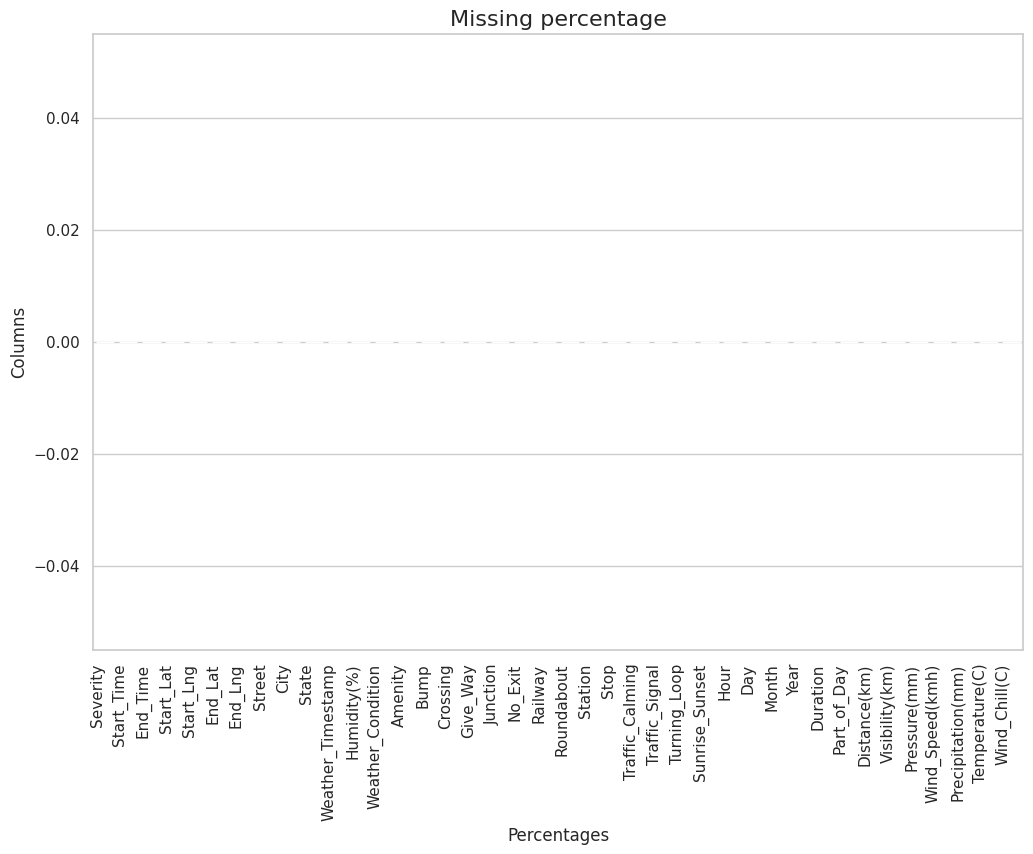

In [57]:
missing_percentage = accidents.isnull().sum().sort_values(ascending=False)/len(accidents)*100

plt.figure(figsize=(12, 8))

sns.barplot(missing_percentage,color = 'red')
plt.title('Missing percentage', fontsize=16)
plt.xlabel('Percentages', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.xticks(rotation = 90,ha = 'right')
plt.show()

In [10]:
num_cols=accidents.select_dtypes(include=['float64','int64']).columns
cat_cols=accidents.select_dtypes(include=['object']).columns

print('Numerical Data\n',num_cols)
print('\nCategorical Data\n',cat_cols)

Numerical Data
 Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

Categorical Data
 Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


## Visualizing the Distribution Of Values in Numerical columns

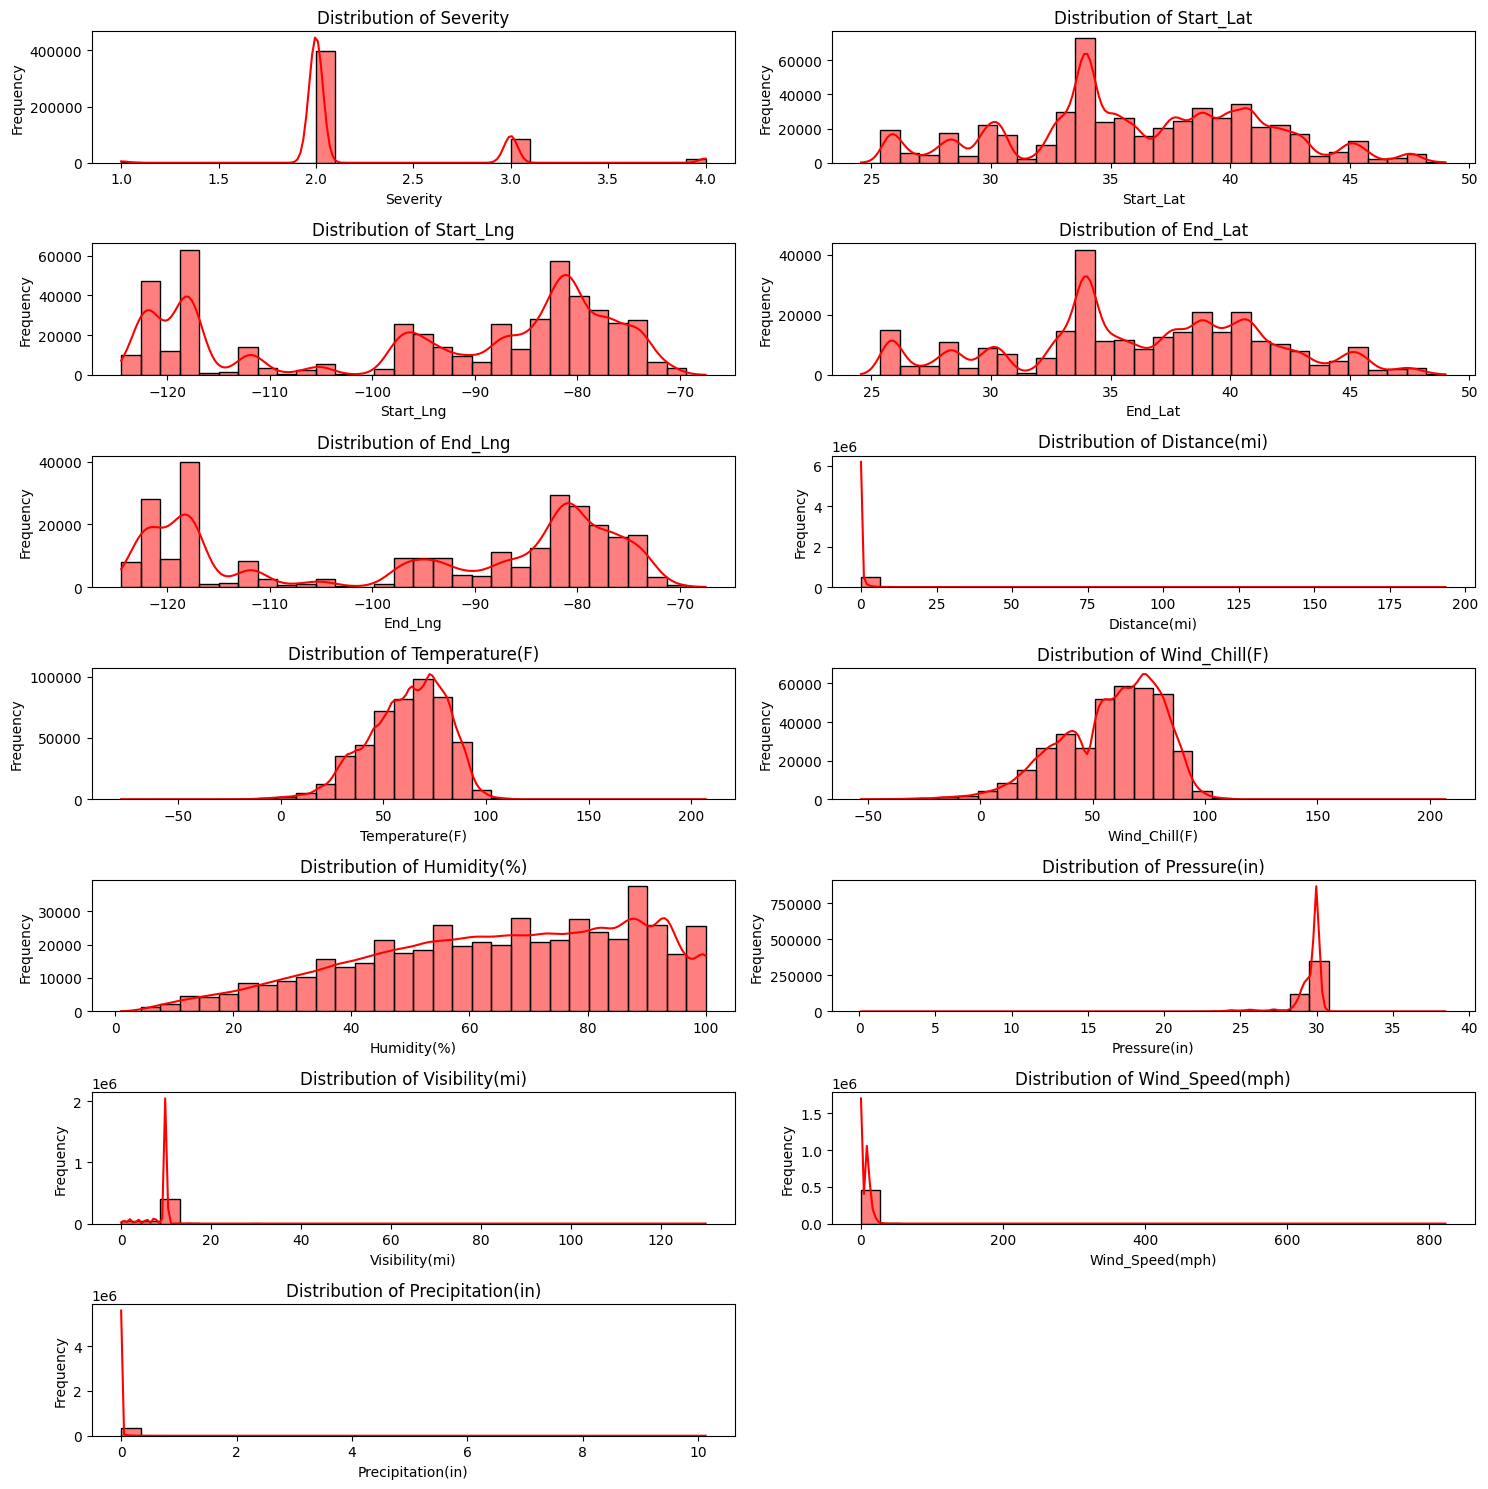

In [11]:
# Plot the distribution of each numerical column to see how to impute the missing values
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 2, i)
    sns.histplot(accidents[col], kde= True, bins=30,color = 'red')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Handling Missing Values

### 1] Mean and Median imputations for Numerical Columns

In [12]:
# I will use the mean for filling  Temperature(F) due to its symmetry
# and the median for other columns to mitigate the effects of outliers and skewed distributions.
accidents['Temperature(F)']=accidents['Temperature(F)'].fillna(accidents['Temperature(F)'].mean())

In [13]:
# Weather-related numerical columns  
weather_numeric = ['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']
for col in weather_numeric:
    accidents[col] = accidents[col].fillna(accidents[col].median())

### 2] Handling missing Values for Categorical Columns

In [14]:
# check for unique values of each col
cat_cols=accidents.select_dtypes(include=['object']).columns

for cat in cat_cols:
    print(cat, accidents[cat].nunique())

ID 500000
Source 3
Start_Time 487027
End_Time 493821
Description 408146
Street 88272
City 9488
County 1606
State 49
Zipcode 127804
Country 1
Timezone 4
Airport_Code 1878
Weather_Timestamp 255623
Wind_Direction 24
Weather_Condition 108
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


In [15]:
# Categorical columns with few missing values  
accidents['Street'] = accidents['Street'].fillna('Unknown')
accidents['Zipcode'] = accidents['Zipcode'].fillna('Unknown')
accidents['City'] = accidents['City'].fillna('Unknown')

In [16]:
# Weather-related categorical columns  
accidents['Weather_Condition'] = accidents['Weather_Condition'].fillna('Unknown')

# Time-related columns 
accidents['Weather_Timestamp'] = accidents['Weather_Timestamp'].fillna(accidents['Start_Time'])

In [18]:
# Use Start_Lat and Start_Lng as an approximation (assume the accident did not deviate).  
accidents['End_Lat'] = accidents['End_Lat'].fillna(accidents['Start_Lat'])
accidents['End_Lng'] = accidents['End_Lng'].fillna(accidents['Start_Lng'])

## Dropping columns which are not crucial for predicting severity 

In [17]:
accidents.drop(['Astronomical_Twilight', 'Nautical_Twilight','Country','Description', 'County','ID','Source', 'Zipcode', 'Timezone', 'Airport_Code','Wind_Direction', 'Civil_Twilight'], axis=1, inplace=True)

## Handling Inconsistencies in Date columns.
## Also convert Date Columns to datetime

In [19]:
# list "Start_Time" column dates lengths
date_lengths = accidents["Start_Time"].str.len()
print(date_lengths.value_counts())

Start_Time
19    451837
29     44286
26      3877
Name: count, dtype: int64


In [20]:
# rows with dates length of 19
indices = np.where([date_lengths == 19])[1]
accidents.iloc[indices].head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,30.641211,-91.153481,0.000,Highway 19,Zachary,...,False,False,False,False,False,False,False,True,False,Day
3,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,14th St NW,Austin,...,False,False,False,False,False,False,False,False,False,Day
4,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,River Blvd,Bakersfield,...,False,False,False,False,False,False,False,False,False,Night
5,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,42.532082,-70.944267,0.000,Lowell St,Peabody,...,False,False,False,False,False,False,False,True,False,Day
6,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,42.421280,-123.119450,0.000,I-5 N,Gold Hill,...,False,False,False,False,False,False,False,False,False,Day


In [21]:
# rows with dates length of 26
indices = np.where([date_lengths == 26])[1]
accidents.iloc[indices].head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
121,2,2021-02-02 23:54:35.000000,2021-02-03 01:51:37.000000,42.469340,-91.086799,42.471268,-91.134196,2.419,Route 20,Dyersville,...,False,False,False,False,False,False,False,False,False,Night
167,2,2022-04-08 16:18:29.000000,2022-04-08 18:28:57.000000,32.514702,-93.747115,32.513396,-93.746910,0.091,Spring St,Shreveport,...,False,False,False,False,False,False,False,False,False,Day
178,2,2022-12-15 20:41:00.000000,2022-12-15 21:01:00.000000,45.129281,-93.361962,45.130119,-93.384056,1.079,MN-610 W,Minneapolis,...,False,False,False,False,False,False,False,False,False,Night
179,2,2021-09-25 14:25:00.000000,2021-09-25 15:45:02.000000,30.265859,-97.738607,30.266030,-97.738538,0.013,E 5th St,Austin,...,False,False,False,False,False,False,False,True,False,Day
184,2,2022-07-31 19:56:00.000000,2022-07-31 22:38:26.000000,41.288490,-72.597656,41.288264,-72.619855,1.153,Governor John Davis Lodge Tpke S,Madison,...,False,False,False,False,False,False,False,False,False,Day


In [22]:
# rows with dates length of 29
indices = np.where([date_lengths == 29])[1]
accidents.iloc[indices].head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Forest Ridge Dr,Sterling,...,False,False,False,False,False,False,False,False,False,Night
2,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Floradale Ave,Lompoc,...,False,False,False,False,False,False,False,True,False,Day
7,2,2021-08-13 16:48:00.000000000,2021-08-13 19:09:09.000000000,30.191010,-85.682508,30.190329,-85.682530,0.047,Claremont Dr,Panama City,...,False,False,False,False,False,False,False,False,False,Day
24,2,2022-02-16 08:30:07.000000000,2022-02-16 10:15:30.000000000,28.640424,-81.422328,28.639184,-81.406288,0.976,Maitland Blvd,Altamonte Springs,...,False,False,False,False,False,False,False,False,False,Day
27,2,2022-03-22 07:22:30.000000000,2022-03-22 11:12:00.000000000,33.120965,-117.321490,33.100054,-117.308585,1.626,I-5 S,Carlsbad,...,False,False,False,False,False,False,False,False,False,Day


In [23]:
# slice all "Start_Time" column dates to legth of 19
accidents["Start_Time_parsed"]=accidents["Start_Time"].str[:19]

# parse "Start_Time" column to datetime 
accidents["Start_Time_parsed"] = pd.to_datetime(accidents["Start_Time_parsed"], format="%Y-%m-%d %H:%M:%S")
accidents["Start_Time_parsed"]

0        2019-06-12 10:10:56
1        2022-12-03 23:37:14
2        2022-08-20 13:13:00
3        2022-02-21 17:43:04
4        2020-12-04 01:46:00
                 ...        
499995   2021-12-15 07:30:00
499996   2021-12-19 16:25:00
499997   2022-04-13 19:28:29
499998   2020-05-15 17:20:56
499999   2022-04-02 23:23:13
Name: Start_Time_parsed, Length: 500000, dtype: datetime64[ns]

In [24]:
# list "End_Time" column dates lengths
date_lengths = accidents["End_Time"].str.len()
date_lengths.value_counts()

End_Time
19    451837
29     44286
26      3877
Name: count, dtype: int64

In [25]:
# slice all "End_Time" column dates to length of 19
accidents["End_Time_parsed"] = accidents["End_Time"].str[:19]

# parse "Start_Time" column into datetime
accidents["End_Time_parsed"] = pd.to_datetime(accidents["End_Time_parsed"], format="%Y-%m-%d %H:%M:%S")
accidents["End_Time_parsed"]

0        2019-06-12 10:55:58
1        2022-12-04 01:56:53
2        2022-08-20 15:22:45
3        2022-02-21 19:43:23
4        2020-12-04 04:13:09
                 ...        
499995   2021-12-15 07:50:30
499996   2021-12-19 17:40:37
499997   2022-04-13 21:33:44
499998   2020-05-15 17:50:56
499999   2022-04-03 00:49:48
Name: End_Time_parsed, Length: 500000, dtype: datetime64[ns]

In [26]:
# check for weather timestamp different lengths
date_lengths = accidents["Weather_Timestamp"].str.len()
date_lengths.value_counts()

Weather_Timestamp
19    499090
29       838
26        72
Name: count, dtype: int64

In [27]:
accidents["Weather_Timestamp_parsed"] = accidents["Weather_Timestamp"].str[:19]
# check for weather timestamp different lengths
date_lengths = accidents["Weather_Timestamp_parsed"].str.len()
date_lengths.value_counts()

Weather_Timestamp_parsed
19    500000
Name: count, dtype: int64

In [28]:
# parse timestamp to datetime
accidents["Weather_Timestamp_parsed"] = pd.to_datetime(accidents["Weather_Timestamp_parsed"], format="%Y-%m-%d %H:%M:%S")
accidents["Weather_Timestamp_parsed"]

0        2019-06-12 09:53:00
1        2022-12-03 23:52:00
2        2022-08-20 12:56:00
3        2022-02-21 17:35:00
4        2020-12-04 01:54:00
                 ...        
499995   2021-12-15 07:14:00
499996   2021-12-19 16:53:00
499997   2022-04-13 19:53:00
499998   2020-05-15 17:15:00
499999   2022-04-02 23:53:00
Name: Weather_Timestamp_parsed, Length: 500000, dtype: datetime64[ns]

## Feature Engineering - Extract time components

In [29]:
accidents["Hour"] = accidents["Start_Time_parsed"].dt.hour + 1  # hour of the accident (1-24)
accidents["Day"] = accidents["Start_Time_parsed"].dt.weekday + 1  # day of week (1-7)
accidents["Month"] = accidents["Start_Time_parsed"].dt.month  # month of accident (1-12)
accidents["Year"] = accidents["Start_Time_parsed"].dt.year  # year of accident

# Calculate accident duration 
accidents["Duration"] = (accidents["End_Time_parsed"] - accidents["Start_Time_parsed"])

# Fill null durations with median
duration_median = accidents["Duration"].median()
accidents.fillna({'Duration':duration_median}, inplace=True)

# Convert hour to part of day categories
accidents['Part_of_Day'] = pd.cut(accidents['Hour'],
                                 bins=[0, 6, 12, 18, 24],
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                 include_lowest=True)

# Convert hour to part of day categories
accidents['Sunrise_Sunset'] = pd.cut(accidents['Hour'],
                                 bins=[0, 16,  24],
                                 labels=['Day', 'Night'],
                                 include_lowest=True)


# Display the new features
accidents[["Hour", "Day", "Month", "Year", "Duration", "Part_of_Day"]].head()

,Hour,Day,Month,Year,Duration,Part_of_Day
0,11,3,6,2019,0 days 00:45:02,Morning
1,24,6,12,2022,0 days 02:19:39,Evening
2,14,6,8,2022,0 days 02:09:45,Afternoon
3,18,1,2,2022,0 days 02:00:19,Afternoon
4,2,5,12,2020,0 days 02:27:09,Night


In [30]:
accidents.isnull().sum().sort_values(ascending=False)

Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Street                      0
City                        0
State                       0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Su

## US measurement units to European measurement units

In [31]:
# data before conversion 
accidents[["Distance(mi)", "Visibility(mi)", "Pressure(in)", "Wind_Speed(mph)", "Precipitation(in)", "Temperature(F)", "Wind_Chill(F)"]].head()

,Distance(mi),Visibility(mi),Pressure(in),Wind_Speed(mph),Precipitation(in),Temperature(F),Wind_Chill(F)
0,0.000,10.0,29.92,5.0,0.0,77.0,77.0
1,0.056,10.0,29.91,5.0,0.0,45.0,43.0
2,0.022,10.0,29.79,13.0,0.0,68.0,68.0
3,1.054,10.0,28.49,15.0,0.0,27.0,15.0
4,0.046,10.0,29.77,0.0,0.0,42.0,42.0


In [32]:
# convert distance from miles to kilometers
accidents["Distance(km)"]=accidents["Distance(mi)"]*1.609344

# convert visibility from miles to kilometers.
accidents["Visibility(km)"] = accidents["Visibility(mi)"] * 1.609344


# convert pressure in the air from inches to millimeter.
accidents["Pressure(mm)"] = accidents["Pressure(in)"] * 25.4

# convert wind speed from miles per hour to kilometers per hour.
accidents["Wind_Speed(kmh)"] = accidents["Wind_Speed(mph)"] * 1.609344

# convert precipitation from inches to millimeter.
accidents["Precipitation(mm)"] = accidents["Precipitation(in)"] * 25.4

# convert temperature from fahrenheit to celsius
accidents["Temperature(C)"] = (accidents["Temperature(F)"] - 32) * 5/9

# convert wind chill fahrenheit to celsius
accidents["Wind_Chill(C)"] = (accidents["Wind_Chill(F)"] - 32) * 5/9

In [33]:
accidents[["Distance(km)", "Visibility(km)", "Pressure(mm)", "Wind_Speed(kmh)", "Precipitation(mm)", "Temperature(C)", "Wind_Chill(C)"]].head()

,Distance(km),Visibility(km),Pressure(mm),Wind_Speed(kmh),Precipitation(mm),Temperature(C),Wind_Chill(C)
0,0.000000,16.09344,759.968,8.046720,0.0,25.000000,25.000000
1,0.090123,16.09344,759.714,8.046720,0.0,7.222222,6.111111
2,0.035406,16.09344,756.666,20.921472,0.0,20.000000,20.000000
3,1.696249,16.09344,723.646,24.140160,0.0,-2.777778,-9.444444
4,0.074030,16.09344,756.158,0.000000,0.0,5.555556,5.555556


In [34]:
# remove old columns 
accidents.drop(["Distance(mi)", "Visibility(mi)", "Pressure(in)", "Wind_Speed(mph)", "Precipitation(in)", "Temperature(F)", "Wind_Chill(F)"], axis=1, inplace=True)

In [35]:
# rename "Start/End_Time_parsed" to "Start/End_Time" and remove old columns
accidents["Start_Time"] = accidents["Start_Time_parsed"]
accidents["End_Time"] = accidents["End_Time_parsed"]
accidents["Weather_Timestamp"] = accidents["Weather_Timestamp_parsed"]
accidents.drop(["Start_Time_parsed", "End_Time_parsed", "Weather_Timestamp_parsed"], axis=1, inplace=True)

In [36]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   Severity           500000 non-null  int64          
 1   Start_Time         500000 non-null  datetime64[ns] 
 2   End_Time           500000 non-null  datetime64[ns] 
 3   Start_Lat          500000 non-null  float64        
 4   Start_Lng          500000 non-null  float64        
 5   End_Lat            500000 non-null  float64        
 6   End_Lng            500000 non-null  float64        
 7   Street             500000 non-null  object         
 8   City               500000 non-null  object         
 9   State              500000 non-null  object         
 10  Weather_Timestamp  500000 non-null  datetime64[ns] 
 11  Humidity(%)        500000 non-null  float64        
 12  Weather_Condition  500000 non-null  object         
 13  Amenity            500000 non

## Undersampling Implementation

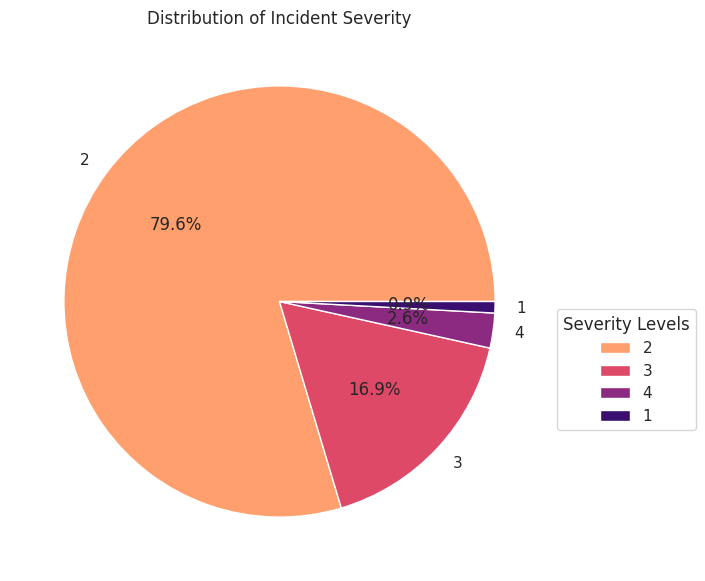

In [37]:
# Count the occurrences of each severity level
severity_count = accidents['Severity'].value_counts()

# Create the pie chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
pastel_colors = sns.color_palette("magma_r", len(severity_count))

plt.pie(
    severity_count,
    labels=severity_count.index,
    autopct='%1.1f%%',
    colors=pastel_colors
)
plt.legend(title='Severity Levels', loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Incident Severity')
plt.show()

In [38]:
accidents["Severity"].value_counts() 

Severity
2    398142
3     84520
4     13064
1      4274
Name: count, dtype: int64

In [39]:
def undersample_by_severity(df, random_state=42):
    min_severity_count = df['Severity'].value_counts().min()
    undersampled_df = df.groupby('Severity', group_keys=False).sample(n=min_severity_count, random_state=random_state)
    return undersampled_df

# Apply the function
accidents_final = undersample_by_severity(accidents)

# Shuffle the result (optional, but good practice)
accidents_final = accidents_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Print class distribution
print(accidents_final['Severity'].value_counts())

Severity
4    4274
1    4274
2    4274
3    4274
Name: count, dtype: int64


In [40]:
accidents_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17096 entries, 0 to 17095
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Severity           17096 non-null  int64          
 1   Start_Time         17096 non-null  datetime64[ns] 
 2   End_Time           17096 non-null  datetime64[ns] 
 3   Start_Lat          17096 non-null  float64        
 4   Start_Lng          17096 non-null  float64        
 5   End_Lat            17096 non-null  float64        
 6   End_Lng            17096 non-null  float64        
 7   Street             17096 non-null  object         
 8   City               17096 non-null  object         
 9   State              17096 non-null  object         
 10  Weather_Timestamp  17096 non-null  datetime64[ns] 
 11  Humidity(%)        17096 non-null  float64        
 12  Weather_Condition  17096 non-null  object         
 13  Amenity            17096 non-null  bool       

## Understanding Correlation between numerical features and the Target Variable

In [41]:
# 1. Check data type of 'Severity'
print("Type of 'Severity':", accidents_final['Severity'].dtype)

# 2. Convert Boolean to 0/1
for col in accidents_final.select_dtypes(include=['bool']).columns:
    accidents_final[col] = accidents_final[col].astype(int)

# 3. Selecting numeric columns while forcing inclusion of 'Severity'
numeric_cols = accidents_final.select_dtypes(include=['number']).columns
if 'Severity' not in numeric_cols:
    numeric_cols = list(numeric_cols) + ['Severity']  # Explicit addition
accidents_final = accidents_final[numeric_cols]

# 4. Correlation calculations
corr_matrix = accidents_final.corr()
corr_with_severity = corr_matrix[['Severity']].drop(index='Severity').sort_values('Severity', ascending=False)

Type of 'Severity': int64


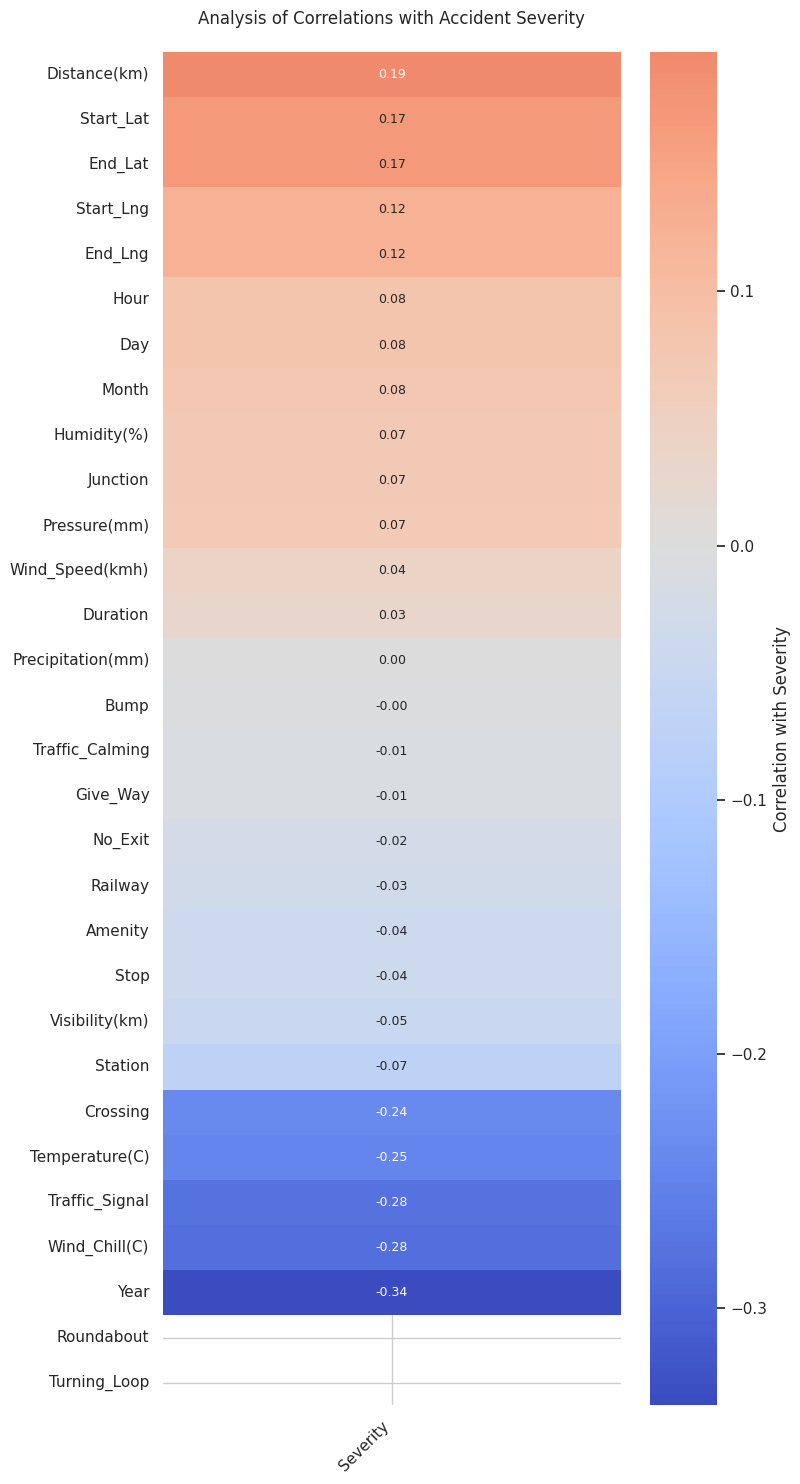

In [42]:

# 5. Enhanced Visualizations
plt.figure(figsize=(8, max(6, len(corr_with_severity)/2)))
sns.heatmap(corr_with_severity,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            annot_kws={'size': 9},
            cbar_kws={'label': 'Correlation with Severity'})
plt.title('Analysis of Correlations with Accident Severity', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# 6. Analysis of Top 10 Most Correlated Features (Absolute Value)
top_10 = corr_with_severity.assign(Absolute=corr_with_severity['Severity'].abs()) \
                          .sort_values('Absolute', ascending=False) \
                          .head(10) \
                          .drop(columns='Absolute')
print("Top 10 features most related to severity:")
display(top_10.style
       .background_gradient(cmap='coolwarm', vmin=-1, vmax=1)
       .set_caption('Correlations with Severity (absolute value)')
       .format({'Severity': '{:.3f}'}))


Top 10 features most related to severity:


,Severity
Year,-0.338
Wind_Chill(C),-0.283
Traffic_Signal,-0.279
Temperature(C),-0.246
Crossing,-0.239
Distance(km),0.194
Start_Lat,0.167
End_Lat,0.167
Start_Lng,0.124
End_Lng,0.124


## Feature Selection and splitting of dataset into training and testing data

In [44]:
# 1. Feature selection based on correlations
selected_features = [
    'Year', 'Hour', 'Day','Month','End_Lat','Traffic_Signal',
    'Start_Lat', 'End_Lng', 'Start_Lng','Temperature(C)',
    'Distance(km)', 'Traffic_Signal','Crossing'
]

X = accidents_final[selected_features]
y = accidents_final['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

## Hyperparameter Tuning using RandomizedSearchCV

In [62]:
param_grid = {
    'n_estimators': [50,100,200],  # Reduced n_estimators
    'max_depth': [None, 10, 20, 50],  # Reduced max_depth
    'min_samples_split': [2, 5, 8],  # Reduced min_samples_split
    'min_samples_leaf': [1, 2, 5],  # Reduced min_samples_leaf
    'bootstrap': [True, False],
    'class_weight': ['balanced','balanced_subsample', None]  # Reduced class_weight options
}

In [48]:
# Create a RandomizedSearchCV object
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=20,  # Number of random combinations to try
                                   cv=3,  # Cross-validation folds
                                   verbose=1,
                                   random_state=42,
                                   scoring='accuracy',
                                   n_jobs=-1)  # Use all available cores

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'max_depth': [None, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [49]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced_subsample', 'bootstrap': False}


## Model Training using best parameters

In [50]:
#  Train a Random Forest model
model = RandomForestClassifier(**best_params, random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

## Creating model directory for streamlit application

In [52]:
# Create the model directory if it doesn't exist
os.makedirs('model', exist_ok=True)  # Creates a folder named "model" in the current directory

# Save the trained model
joblib.dump(model, 'model/best_rf.joblib')
print("Trained model saved to model/best_rf.joblib")

# Save the feature names
feature_columns = X_train.columns.tolist()  # Get feature names from your training data
with open('model/feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)
print("Feature columns saved to model/feature_columns.json")

Trained model saved to model/best_rf.joblib
Feature columns saved to model/feature_columns.json


## Model Prediction and Evaluation

In [54]:
y_pred = model.predict(X_test)

print("\nValidation Set Performance:")
print(classification_report(y_test, y_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           1       0.91      0.92      0.91       855
           2       0.67      0.55      0.61       855
           3       0.71      0.71      0.71       855
           4       0.69      0.81      0.74       855

    accuracy                           0.75      3420
   macro avg       0.75      0.75      0.74      3420
weighted avg       0.75      0.75      0.74      3420



In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7470760233918129


## Conclusion

This project successfully developed and  evaluated a machine learning model for accident severity prediction, leveraging the Random Forest Classifier. Through a sophisticated pipeline, including meticulous feature engineering and extensive hyperparameter tuning using RandomizedSearchCV, the model achieved overall accuracy of 0.747 on the unseen validation set.

The detailed classification report further highlights strong performance, particularly for crucial severity classes, demonstrating robust precision, recall, and F1-scores. This high level of predictive capability underscores the model's excellent generalization ability and its readiness for real-world application. 